In [1]:
# Import modules

import numpy as np
import matplotlib.pyplot as plt

import astropy.constants as con

import pymsg
import read_mist_models

# Set plot parameters

plt.rcParams.update({'font.size': 16})

In [2]:
# Create PhotGrid objects

photgrid_B = pymsg.PhotGrid('pg-Johnson-B.h5')
photgrid_V = pymsg.PhotGrid('pg-Johnson-V.h5')

In [3]:
# Read isochrone data file

iso = read_mist_models.ISO('MIST.iso')

# Extract stellar parameters

Teff = 10**iso.isos[0]['log_Teff']
logg = iso.isos[0]['log_g']

R = 10**iso.isos[0]['log_R']*con.R_sun.value

Reading in: MIST.iso


In [4]:
# Evaluate irradiances

n = len(Teff)

F_obs_B = np.empty(n)
F_obs_V = np.empty(n)

for i in range(n):

    # Set up photospheric parameters dict

    x = {'Teff': Teff[i],
         'log(g)': logg[i]}
    
    # Evaluate irradiances. Use try/execpt clause to deal with 
    # points that fall outside the grid

    try:
        F_obs_B[i] = (R[i]/(10*con.pc.value))**2 * photgrid_B.flux(x)
        F_obs_V[i] = (R[i]/(10*con.pc.value))**2 * photgrid_V.flux(x)
    except (ValueError, LookupError):
        F_obs_B[i] = np.NAN
        F_obs_V[i] = np.NAN

Text(0, 0.5, '$M_V$')

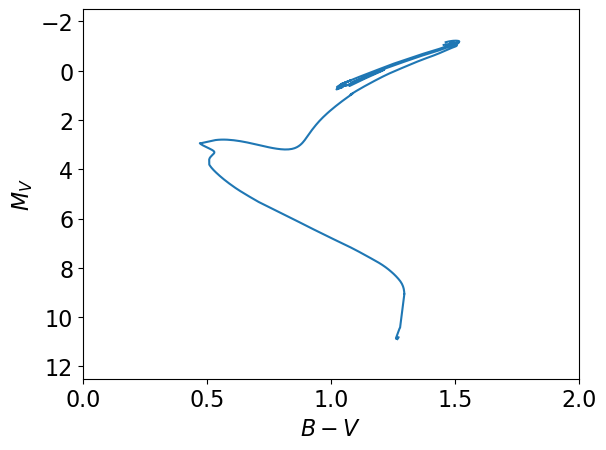

In [6]:
# Evaluate absolute magnitudes

M_B = -2.5*np.log10(F_obs_B)
M_V = -2.5*np.log10(F_obs_V)

# Plot the CMD

plt.figure()

plt.plot(M_B-M_V, M_V)

plt.xlim(0, 2)
plt.ylim(12.5,-2.5)

plt.xlabel('$B-V$')
plt.ylabel('$M_V$')